## Image processing

In this practical session, we'll dive into the essentials of image processing, exploring how digital images are represented and manipulated. Our focus will span three key areas:

- Basics About Images: Learn to display images and understand their structure, laying the foundation for all image processing tasks.

- Mathematical Morphology: Delve into operations that manipulate the shape of objects in images, crucial for preprocessing and feature extraction.

- Harris Corner Detector: Explore this algorithm for detecting corners, a critical feature in tasks like image matching and object recognition.


Let's load some image samples using the library `skimage`

In [4]:
import skimage as ski
import plotly.express as px
import matplotlib.pyplot as plt

Load the colorwheel image from skimage (ski.data.colorwheel())

In [106]:
img = ski.data.cat()

Display the shape of the image (it should be: (370, 371, 3))

The first 2 dimensions of the dimensions are for the size of the image (number of pixels)

The last dimension is the number of channels. Here its for red, green, blue (rgb image)

In [107]:
img.shape

(300, 451, 3)

Display the image, you can use plotly or matplotlib, as you want

In [108]:
fig = px.imshow(img)
fig.show()

Convert the image to grayscale

The Formula for Grayscale Conversion:
The most common method to convert an image to grayscale is to use a weighted sum of the RGB (Red, Green, Blue) values of each pixel. The formula reflects the human eye's sensitivity to different colors and is given by:

$$
Gray=0.2989×Red+0.5870×Green+0.1140×Blue
$$

This formula assigns higher weights to the green channel, acknowledging our eyes' greater sensitivity to green, followed by red and blue. By applying this formula, we convert each pixel's color value to a single intensity value, resulting in a grayscale image.



Then convert the image to grayscale but using the following formula

$$
Gray=0.2989×Red+0.5870×Green+0.1140×Blue
$$

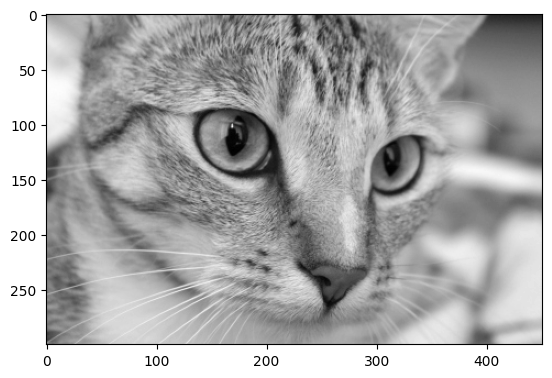

In [109]:
gray_image_np = 0.2989 * img[:,:,0] + 0.5870 * img[:,:,1] + 0.1140 * img[:,:,2]
plt.imshow(gray_image_np, cmap='gray')

#### Exploring Gaussian Blur and Contrast Adjustment


In this section of the practical exercise, you will delve into two fundamental image processing techniques: Gaussian blur and contrast adjustment. These techniques are instrumental in enhancing image quality and feature visibility, making them crucial for tasks such as image segmentation and object recognition. You will use `skimage.filters.gaussian` for applying Gaussian blur and `skimage.exposure.equalize_adapthist` for adjusting the image contrast. By manipulating the hyperparameters of these functions, you will observe how each technique affects the image's appearance and quality.

**Gaussian filter**

Gaussian blur is a smoothing technique commonly used in image processing to reduce noise and detail. It works by convolving the image with a Gaussian function, effectively averaging the pixels in the vicinity of each point with weights decreasing with distance from the central pixel. This process results in a blur that preserves edges better than uniform averaging.

Use the function `gaussian`

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning:

Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.



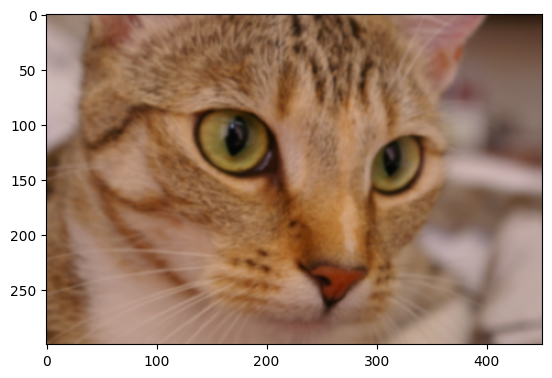

In [112]:
gaussian_filtered = ski.filters.gaussian(img, sigma=1)
plt.imshow(gaussian_filtered)

**Contrast adjustment**

Contrast in an image refers to the difference in luminance or color that makes an object distinguishable. In images with poor contrast, distinguishing features or details can be difficult. Adjusting the contrast can make these features more pronounced. Adaptive histogram equalization, and specifically its variant called Contrast Limited Adaptive Histogram Equalization (CLAHE), is a method for contrast adjustment that improves local contrast in images, particularly useful in areas that are darker or lighter than most of the image.


Use the function `equalize_adapthist` from skimage

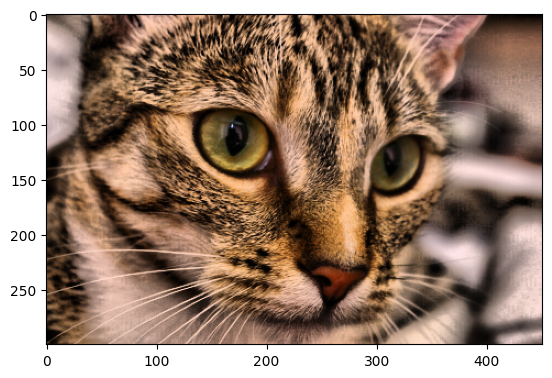

In [114]:
contrast_adjusted = ski.exposure.equalize_adapthist(img, clip_limit=0.03)
plt.imshow(contrast_adjusted)

### Mathematical morphology

Mathematical morphology is a powerful set of image processing operations that focus on the shape or structure of features in an image. Originating from set theory, it provides tools for extracting image components useful for the representation and description of region shape, such as boundaries, skeletons, and the convex hull. In the context of biological imaging, such as segmenting cells from microscopy images, mathematical morphology can be instrumental. It helps in enhancing image structures relevant for segmentation, thereby facilitating the extraction of meaningful biological information. Operations like erosion, dilation, opening, and closing can remove noise, separate touching objects, and highlight regions of interest, making them essential for preprocessing before applying segmentation algorithms.


We are going to work on a cell image from skimage library.

Please load the image, `skimage.data.cell()`

In [7]:
img = ski.data.cell()
img.shape

(660, 550)

Now plot the image

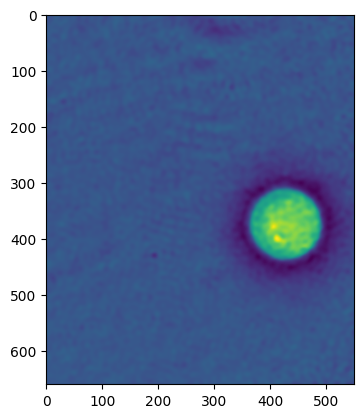

In [8]:
plt.imshow(img)

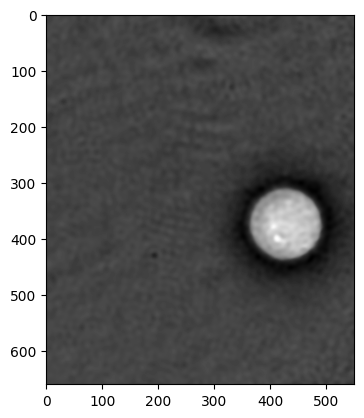

In [6]:
plt.imshow(img, cmap='gray')

**Otsu thresholding method**

We are going to convert our image, from grayscale to binary image representation. In order to achieve this goal, we will use the otsu thresholding method.

In the context of segmenting cells from microscopy images or similar tasks, the purpose of using threshold_otsu is multifold:

Automatic Thresholding: Otsu's method automatically calculates the threshold value based on the image's histogram, making it suitable for applications where the intensity distribution of the image is not known in advance or varies between images. This automation is particularly beneficial in batch processing of images where manual threshold selection would be impractical.

Contrast Enhancement: By separating the foreground from the background, Otsu's thresholding can enhance the contrast between objects of interest (e.g., cells) and the surrounding medium, making subsequent morphological operations more effective in isolating and segmenting the desired features.

Preprocessing Step: It serves as an essential preprocessing step that simplifies the image, reducing it to a form that is easier to analyze and process with morphological operations. This simplification can significantly improve the performance and accuracy of the segmentation process.

Versatility: Although simple, Otsu's method is remarkably versatile and effective across a wide range of applications, particularly in biomedical image analysis where the contrast between objects and background can vary significantly.

Actually, this algorithm will be enough to segment our cell image.

Use the `threshold_otsu` from skimage.filters

to find the optimal threshold

In [10]:
otsu_threshold = ski.filters.threshold_otsu(img)
otsu_threshold

122

Once you have the optimal Otsu threshold to binarize the image

In [12]:
binary_img = img > otsu_threshold
binary_img

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

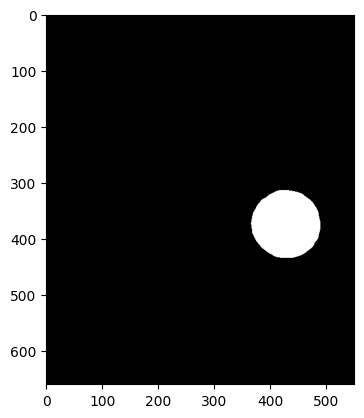

In [14]:
plt.imshow(binary_img, cmap='gray')

Now let's load another images

In [16]:
from skimage import io
data = io.imread("https://github.com/scikit-image/skimage-tutorials/raw/main/images/cells.tif")

Display the shape of `data`, you should have (60, 256, 256)

In [17]:
data.shape

(60, 256, 256)

it means we have 60 images of shape (256, 256)

The data we have comes in the form of a three-dimensional (3D) array with the shape of (60, 256, 256). This means we have 60 slices or layers, and each slice is an image that is 256 pixels wide and 256 pixels tall. Think of this as a stack of 60 photos, each showing a slightly different section of the same object or body part. These images are often obtained from advanced medical imaging techniques like MRI or CT scans, which let us see inside the human body without surgery.

**MRI (Magnetic Resonance Imaging)** is a technique that uses a strong magnetic field and radio waves to create detailed images of the organs and tissues within the body. It's particularly useful for imaging the brain, muscles, and heart, as it can capture the details of soft tissues very well.

**CT (Computed Tomography)** scans, on the other hand, use X-rays to create comprehensive images. Unlike a regular X-ray that shows only a flat image, a CT scan provides a 3D image by taking multiple X-ray measurements from different angles. This makes it extremely useful for examining structures like bones, blood vessels, and tumors.

When we analyze such data, especially from MRI or CT scans, we're essentially looking through these "slices" to understand the structure and condition of the body part in question. Each slice gives us a view of a thin section of the body, and by examining these slices in sequence, we can get a complete picture of the internal anatomy.

Now plot the first images

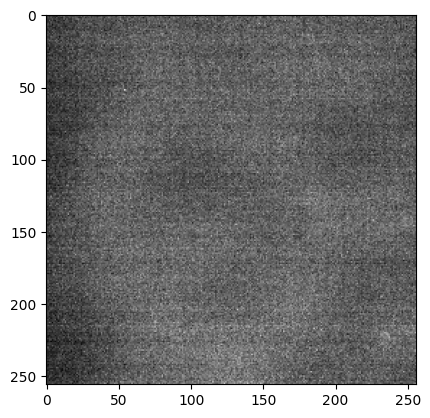

In [18]:
plt.imshow(data[0], cmap='gray')

Plot the first 20 images

With plotly you can directly plot multiple images.

Investigate: `imshow` `facet_col` `binary_string` `facet_col_wrap`

In [24]:
img = data[0:20]
fig = px.imshow(img, facet_col=0, binary_string=True, facet_col_wrap=5)
fig.show()

Now plot the following 20 images

In [25]:
img = data[20:40]
fig = px.imshow(img, facet_col=0, binary_string=True, facet_col_wrap=5)
fig.show()

Now select the 30th image, and plot the image, or any other image, as you want

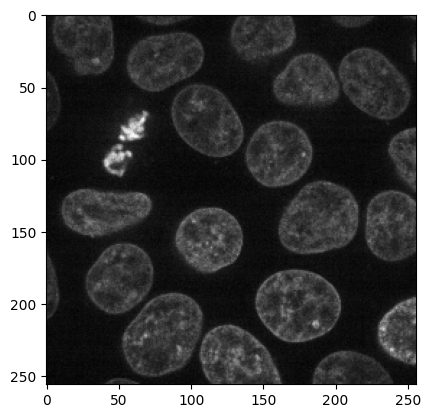

In [27]:
img = data[30]
plt.imshow(img, cmap='gray')

We are going to segment and extract the cells from the image

Apply the Otsu thresholding method, to convert the image from grayscale to binary

In [102]:
thresh = ski.filters.threshold_otsu(img)
binary_image = img > thresh

Plot the binary image

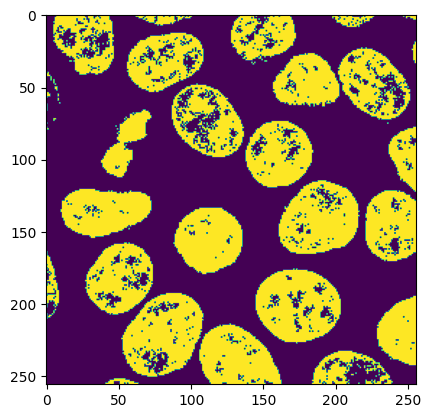

In [103]:
plt.imshow(binary_image)

Try to apply morphology operators, like:
- binary opening
- binary closing
- remove small holes
- area opening
- area closing
- ...

from skimage morphology library

`skimage.morphology.remove_small_holes`

remove_small_holes is a function designed to fill small holes in binary images. A "hole" in this context refers to a set of background pixels (typically valued 0) that are completely enclosed by foreground pixels (typically valued 1). The function's purpose is to enhance image segmentation quality by ensuring that objects of interest are solid without internal gaps that might interfere with analysis.

How it works:

- Identification of Holes: The algorithm first identifies all background regions that are not connected to the image border. Any such region is considered a hole because it is surrounded by the foreground.

- Size Filtering: Each identified hole is then compared against a specified size threshold. If the hole's area (the number of pixels it contains) is smaller than this threshold, it is filled; otherwise, it is left unchanged.

- Filling Holes: Filling is achieved by changing the value of all pixels in the hole from the background value (0) to the foreground value (1).
This operation is particularly useful for post-processing binary segmentation results where small gaps within objects can adversely affect morphological analyses or object counting

`skimage.morphology.area_closing`

area_closing is related to the concept of morphological closing but operates based on the area of dark regions instead of structuring element shape and size. This operation is applied to grayscale (or binary) images and is intended to remove small dark spots and small black holes on the foreground objects.

How it works:

- Dark Spot Identification: It identifies all dark regions (sets of connected dark pixels) in the image.

- Size Thresholding: Each dark region's area is compared against a specified threshold. Dark regions smaller than this threshold are considered noise or small holes and are filled in to match the surrounding brighter area.

- Application: The operation smooths the contour of bright regions and fills in dark spots and holes within those bright regions, without significantly altering the overall shapes.

Area closing is particularly effective for smoothing the contours of bright structures and closing small dark gaps within them.


`skimage.morphology.area_opening`

Conversely, area_opening targets the removal of small bright structures from a dark background. It is the counterpart to area_closing and is useful for cleaning up noise in dark regions without affecting the larger, more significant bright structures.

How it works:

- Bright Spot Identification: Identifies all bright regions in the image.

- Size Thresholding: Compares the area of these bright regions against a specified threshold. Bright regions that are smaller than this threshold are considered to be noise or insignificant objects and are removed (their pixels are made darker to match the surrounding area).

- Application: This operation smooths the contours of dark regions by removing small bright spots and artifacts within them, enhancing the clarity and focus on significant objects.

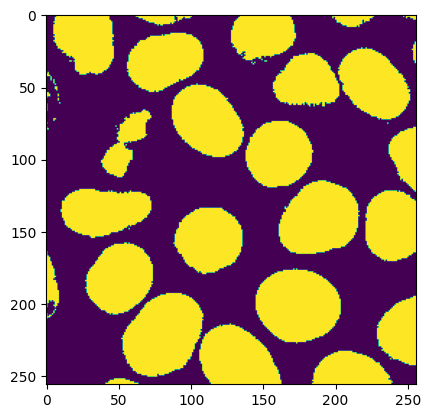

In [104]:
new_img = ski.morphology.remove_small_holes(binary_image, area_threshold=512)
plt.imshow(new_img)

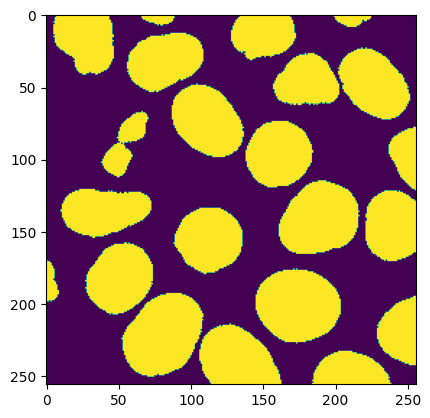

In [105]:
new_img = ski.morphology.binary_opening(new_img, ski.morphology.disk(4))
plt.imshow(new_img)

### Let's detect corners

Here we will leverage OpenCV's Harris Corner Detector to identify and analyze key feature points within images, enabling us to explore the intricacies of feature detection in digital image processing.

A corner in an image represents a point of interest where the direction of edges changes significantly, which typically corresponds to a variation in intensity that indicates a notable feature within the image. Corners are considered crucial in many computer vision tasks because they are easily detectable and are invariant to rotation, translation, and, to some extent, scale changes. These properties make corners suitable for tasks like image matching, object recognition, and scene reconstruction.

Now same as before, load the checkerboard from skimage.data

display the shape and plot the image

In [89]:
image = ski.data.checkerboard()
image.shape

(200, 200)

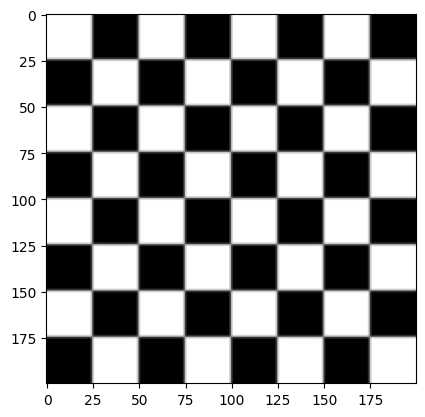

In [90]:
plt.imshow(image, cmap='gray')

Now it's time to compute the Harris Corner Detector using OpenCV in Python

Use the `cornerHarris` function from opencv

In [91]:
import cv2

In [92]:
# The blockSize - size of the neighbourhood considered for corner detection.
# The ksize - aperture parameter for the Sobel operator.
# The k - Harris detector free parameter in the equation.
dst = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)

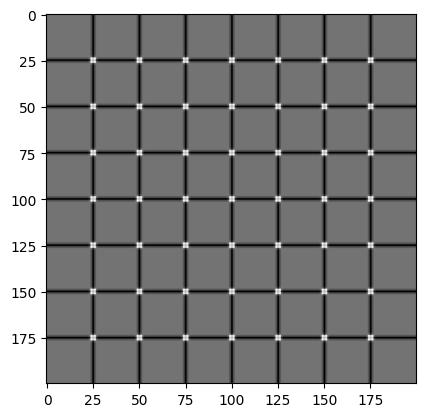

In [93]:
plt.imshow(dst, cmap='gray')

it returns an output array (dst in the provided code) where each pixel value corresponds to the Harris Corner response. Higher values in this array indicate a higher likelihood of a corner.

Now plot the image, with red points on all the corners

In [94]:
import numpy as np

In [95]:
rgb_image = np.stack((image,)*3, axis=-1)

In [96]:
rgb_image[dst>0.01*dst.max()] = [255, 0, 0]

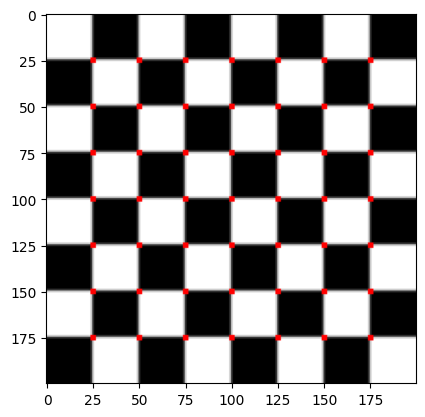

In [97]:
plt.imshow(rgb_image)